In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

data=pd.read_csv('listings.csv')

In [17]:
# step 1: explore the data
# view the top 5 records
print(data.describe())

data.head()

                 id       host_id      latitude     longitude         price  \
count  2.429400e+04  2.429400e+04  24294.000000  24294.000000  24294.000000   
mean   3.368529e+07  1.199929e+08     20.912483   -157.175312    447.318597   
std    1.559680e+07  1.181109e+08      0.772130      1.232824   1234.378582   
min    5.269000e+03  9.080000e+02     18.920250   -159.714620      0.000000   
25%    2.082409e+07  2.743939e+07     20.708020   -157.837410    153.000000   
50%    3.633317e+07  8.715283e+07     20.959110   -156.689970    245.000000   
75%    4.820457e+07  1.673542e+08     21.288097   -156.441722    400.000000   
max    5.377440e+07  4.350678e+08     22.229279   -154.822930  25000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    24294.000000       24294.000000       19330.000000   
mean         6.428748          29.272742           1.142661   
std         16.953293          54.424986           1.238153   
min          1.000000           0.00

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5269,Upcountry Hospitality in the 'Auwai Suite,7620,Lea & Pat,Hawaii,South Kohala,20.02740,-155.70200,Entire home/apt,149,3,16,2021-10-23,0.12,2,193,6,119-269-5808-01R
1,5387,Hale Koa Studio & 1 Bedroom Units!!,7878,Edward,Hawaii,South Kona,19.43081,-155.88069,Entire home/apt,85,5,186,2021-11-25,1.29,2,253,18,NaN
2,5389,Keauhou Villa,7878,Edward,Hawaii,North Kona,19.56604,-155.96199,Entire home/apt,299,6,32,2021-09-25,0.33,2,189,12,NaN
3,5434,Kauai Ocean View 3 Story Tiki Tower Princeville,7984,Ahlea,Kauai,North Shore Kauai,22.22080,-159.46989,Entire home/apt,425,2,134,2021-11-27,0.90,2,231,26,540050300023
4,5930,Poipu Beach Guest House - Orchid - SurfSong,10768,John,Kauai,Koloa-Poipu,21.88139,-159.47248,Private room,140,3,206,2021-12-01,1.54,4,120,27,260060100000


In [56]:
# View the entries and variables data type
print("Entries:\t {}".format(data.shape[0]))
print("Variables:\t {}".format(data.shape[1]))

#data.shape: number of entries and variables, data.dtypes: the attributes for each variables
display(data.dtypes)

# Understand the percentage of missing values :isnull().sum()
count_null = lambda x: x.isnull().sum()/x.count()
data.apply(count_null).sort_values(ascending=False)


#print(data2==0)

Entries:	 24294
Variables:	 18


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

license                           0.295680
reviews_per_month                 0.256803
last_review                       0.256803
host_name                         0.005422
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

In [69]:
# Modification:.fillna(value, inplace=True)
# impute missing values for
# reviews_per_month as 0
data['reviews_per_month'].fillna(0, inplace=True)
data['reviews_per_month'].isnull().sum()

# last_review as min() value
data['last_review'] = pd.to_datetime(data['last_review'])

data['last_review'].fillna(value=data['last_review'].min(), inplace=True)

data['last_review'].isnull().sum()


0

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'host_id'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'minimum_nights'}>],
       [<AxesSubplot:title={'center':'number_of_reviews'}>,
        <AxesSubplot:title={'center':'last_review'}>,
        <AxesSubplot:title={'center':'reviews_per_month'}>],
       [<AxesSubplot:title={'center':'calculated_host_listings_count'}>,
        <AxesSubplot:title={'center':'availability_365'}>,
        <AxesSubplot:title={'center':'number_of_reviews_ltm'}>]],
      dtype=object)

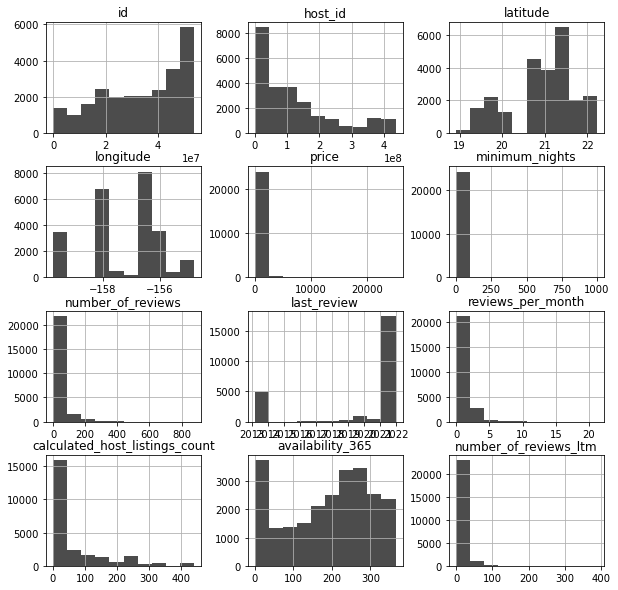

In [70]:
# identify the distribution of the variables, 
data.hist(bins=10, color='k', alpha=0.7, figsize=(10, 10))

In [71]:
data.describe()
# max price and max min_nights are outliers

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,2.429400e+04,2.429400e+04,24294.000000,24294.000000,24294.000000,24294.000000,24294.000000,24294.000000,24294.000000,24294.000000,24294.000000
mean,3.368529e+07,1.199929e+08,20.912483,-157.175312,447.318597,6.428748,29.272742,0.909181,62.647073,190.491274,9.693505
std,1.559680e+07,1.181109e+08,0.772130,1.232824,1234.378582,16.953293,54.424986,1.196684,96.214132,110.709419,15.219455
min,5.269000e+03,9.080000e+02,18.920250,-159.714620,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.082409e+07,2.743939e+07,20.708020,-157.837410,153.000000,1.000000,1.000000,0.080000,2.000000,101.000000,0.000000
50%,3.633317e+07,8.715283e+07,20.959110,-156.689970,245.000000,3.000000,7.000000,0.470000,14.000000,213.000000,3.000000
75%,4.820457e+07,1.673542e+08,21.288097,-156.441722,400.000000,5.000000,32.000000,1.290000,83.000000,279.000000,13.000000
max,5.377440e+07,4.350678e+08,22.229279,-154.822930,25000.000000,1000.000000,878.000000,21.210000,439.000000,365.000000,388.000000


In [88]:
display(data[data['price']>400].sort_values(by='price', ascending =False))


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
13504,39894840,Puamana 43-4 Premium Oceanfront,84983912,"Whalers Investment Group,",Maui,Lahaina,20.85977,-156.66790,Entire home/apt,25000,5,3,2021-09-10,0.52,56,35,3,W20262992-01
13506,39894993,Puamana 64-2 Premium Ocean View,84983912,"Whalers Investment Group,",Maui,Lahaina,20.85981,-156.66752,Entire home/apt,25000,5,1,2021-07-31,0.22,56,0,1,129-636-8640-01
4466,17314620,Puamana 226-3 Oceanfront,84983912,"Whalers Investment Group,",Maui,Lahaina,20.85760,-156.66390,Entire home/apt,25000,5,10,2020-03-07,0.21,56,0,0,070-611-1488-01
20094,49885732,"Albert Rd. Princeville, 4BR executive style ho...",680107,Kahea,Kauai,North Shore Kauai,22.22526,-159.47886,Entire home/apt,24999,3,0,2013-03-05,0.00,146,0,0,540130680000
9637,30507316,"Whaler On Kaanapali 763 - Studio, 1 Bathroom |...",146182295,Kelly,Maui,Lahaina,20.92240,-156.69572,Entire home/apt,24999,4,14,2021-10-15,0.42,49,5,6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16428,46106053,"Ridge Villa 1412. NEW platinum level, FULL rem...",124581034,Ridge Realty Rentals,Maui,Lahaina,21.00162,-156.65838,Entire home/apt,401,5,14,2021-11-25,1.24,26,240,14,GE-206-282-5984-01 ​​​​​​​TA-206-282-5984-01
18849,48823384,"Villa 1712. NEW, Gold Level Villa Offering Swe...",124581034,Ridge Realty Rentals,Maui,Lahaina,21.00056,-156.65923,Entire home/apt,401,1,10,2021-12-05,1.16,26,68,10,G/T 003-030-0162-02
13299,39468272,EXQUISITE REMODEL-SLEEPS 8-WELL EQUIPPED-AC,57940735,Pmi,Maui,Kihei-Makena,20.68916,-156.43694,Entire home/apt,401,4,27,2021-12-05,1.07,69,269,19,TA-210-575-4624-01
5410,19489675,Makaha Beach one of Oahu's best snorkeling sites!,15731946,Kenneth And Lisa,Honolulu,Waianae,21.47585,-158.21852,Entire home/apt,401,7,41,2021-11-29,0.77,3,116,13,"840080160002, TA-088-190-7712-01"


price entry more than 1500:	 794


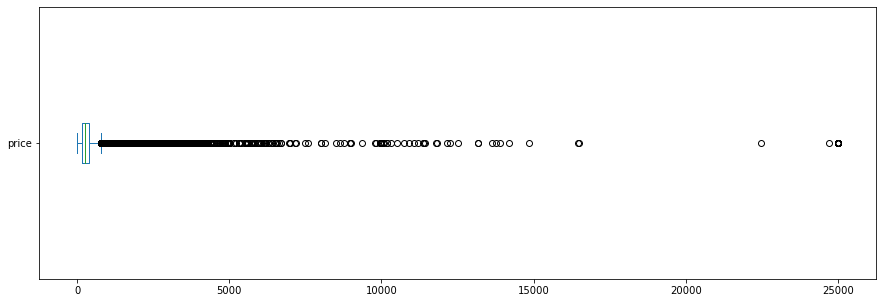

In [121]:

data.price.plot(kind='box', vert=False, figsize=(15,5))

print('price entry more than 1500:\t {}'.format(len(data[data.price>1500])))

minimum_nights entry more than 30:	 269


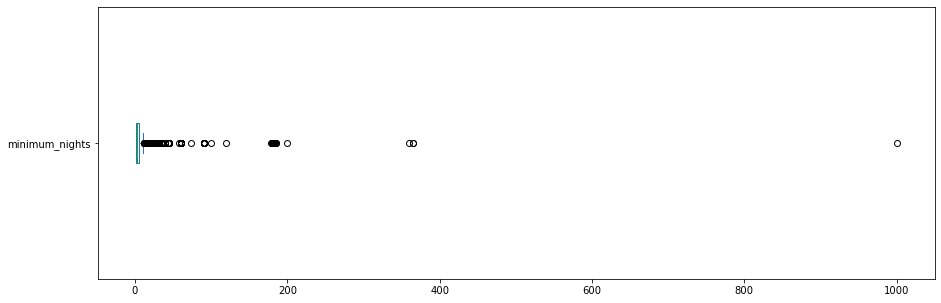

In [122]:
data.minimum_nights.plot(kind='box', vert=False, figsize=(15,5))

print('minimum_nights entry more than 30:\t {}'.format(len(data[data.minimum_nights > 30])))

before: 23240 
 after: 23240


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'host_id'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'minimum_nights'}>],
       [<AxesSubplot:title={'center':'number_of_reviews'}>,
        <AxesSubplot:title={'center':'last_review'}>,
        <AxesSubplot:title={'center':'reviews_per_month'}>],
       [<AxesSubplot:title={'center':'calculated_host_listings_count'}>,
        <AxesSubplot:title={'center':'availability_365'}>,
        <AxesSubplot:title={'center':'number_of_reviews_ltm'}>]],
      dtype=object)

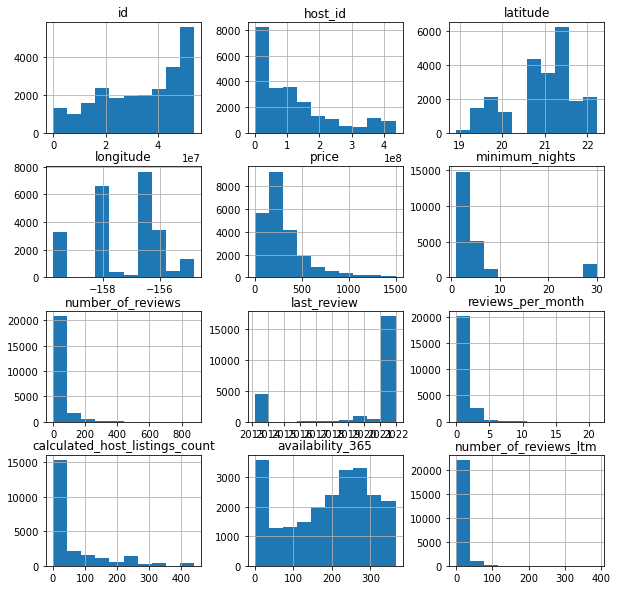

In [140]:
#data=data[(data.minimum_nights<=30)&(data.price<=1500)]

print('before: {}'.format(len(data)), \
      '\n after: {}'.format(len(data[(data.minimum_nights<=30)&(data.price<=1500)])))
data.head()
data.hist(bins=10,figsize=(10,10))


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.092530,-0.228126,-0.272212,0.144119,-0.057073
minimum_nights,-0.092530,1.000000,-0.053107,-0.143295,-0.115439,-0.025654
number_of_reviews,-0.228126,-0.053107,1.000000,0.663025,-0.251762,0.009512
reviews_per_month,-0.272212,-0.143295,0.663025,1.000000,-0.269583,-0.000527
calculated_host_listings_count,0.144119,-0.115439,-0.251762,-0.269583,1.000000,0.202439
availability_365,-0.057073,-0.025654,0.009512,-0.000527,0.202439,1.000000


<AxesSubplot:>

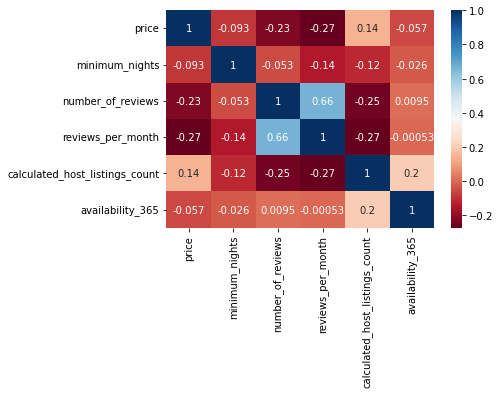

In [147]:
# Correlation between the variables

data_corr=data[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
display(data_corr)

import seaborn as sns
sns.heatmap(data_corr,cmap='RdBu',annot=True)

In [166]:
# display(data.dtypes)
# which room type were rented the most
data.room_type.value_counts().sort_values(ascending=False)

# percentage
data.room_type.value_counts().sort_values(ascending=False)/len(data)


Entire home/apt    0.902410
Private room       0.092685
Hotel room         0.003442
Shared room        0.001463
Name: room_type, dtype: float64

In [164]:

# What is the most expensive location in Hawaii
data.price.groupby(data['neighbourhood']).mean().sort_values(ascending=False)

neighbourhood
Ewa                      460.107226
Koloa-Poipu              450.661803
Waimea-Kekaha            445.869565
Lahaina                  429.729161
South Kohala             412.839854
East Honolulu            386.026490
North Shore Kauai        366.330023
Lanai                    360.857143
Koolauloa                347.122768
Hana                     343.642857
Koolaupoko               340.978892
Paia-Haiku               332.448454
Kihei-Makena             331.092058
Lihue                    303.678049
Makawao-Pukalani-Kula    303.419355
North Shore Oahu         302.497006
Kapaa-Wailua             301.867110
North Kona               259.625532
North Kohala             240.352941
Wailuku-Kahului          235.478261
Waianae                  214.268519
South Kona               211.497908
Kau                      205.124324
Primary Urban Center     200.901685
Hamakua                  188.694915
North Hilo               174.029412
South Hilo               173.904884
Central Oahu  

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
license                                   object
dtype: object

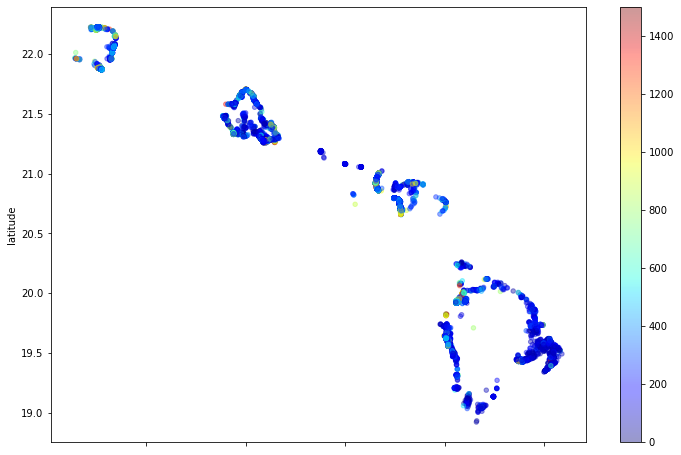

In [176]:
#plot x as latitude y as longtitude

display(data.dtypes)

# plt.scatter(x=data.latitude ,y=data.longitude)

data.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=data['price'],
              cmap=plt.get_cmap('jet'), figsize=(12,8));